# **"Predicting Loan Repayment Outcomes: A Comprehensive Analysis of Machine Learning Algorithms for Classifying Fully Paid vs. Not Fully Paid Loans"**

# Loan Data


**About Loan DataSet**

The information you provided appears to be a list of column headers or variables related to a dataset containing information about loans or credit-related data. Here's a brief description of each column:

1. credit.policy: A binary variable indicating whether a customer meets the credit policy criteria (1 for yes, 0 for no).

2. purpose: The purpose for which the loan was taken (e.g., debt consolidation, credit card, small business).

3. int.rate: The interest rate of the loan.

4. installment: The monthly installment payment amount.

5. log.annual.inc: The natural logarithm of the annual income of the borrower.

6. dti: The debt-to-income ratio of the borrower.(amount of debt divided by annual income)

7. fico: The FICO credit score of the borrower.

8. days.with.cr.line: The number of days the borrower has had a credit line.

9. revol.bal: The revolving balance of the borrower.(amount unpaid at the end of the credit card billing cycle)

10. revol.util: The revolving utilization rate or ratio of the borrower.(the amount of the credit line used relative to total credit available)

11. inq.last.6mths: The number of inquiries made by creditors in the last 6 months.

12. delinq.2yrs: The number of times the borrower has been delinquent on payments in the last 2 years.

13. pub.rec: The number of derogatory public records of the borrower (bankruptcy filings, tax liens, or judgments).

14. not.fully.paid: A binary variable indicating whether the borrower hasn't fully paid the loan (1 for yes, 0 for no).It is my Target.


# **Exploratory Data Analysis - Loan Data**

**Import Necessary libararies**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)


**Load Datsset**

In [2]:
#Load dataset
df=pd.read_csv('loan_data.csv')

In [3]:
#Top 5 Rows of the dataset
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Checking Top 5 rows of the dataset.Basically by default` head() `will give top 5 rows from the data set

In [4]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8540,0,all_other,0.1166,247.90,11.184421,21.22,702,3689.958333,87698,33.6,1,0,0,0
2263,1,debt_consolidation,0.1505,294.88,10.491274,18.57,667,1830.000000,8297,72.1,0,0,0,1
6447,1,small_business,0.1670,541.40,10.242813,13.16,747,1140.000000,29,0.3,2,0,0,1
6451,1,debt_consolidation,0.1114,203.39,10.085809,8.90,737,4470.041667,6143,56.4,1,0,0,1
8897,0,credit_card,0.0800,282.03,11.512925,23.90,777,6660.041667,212878,5.8,2,0,0,0


Checking for 3 Random rows of our dataset

In [5]:
#Last 5 rows of the dataset
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


Checking The botton 5 rows of the dataset.by default `tail() `will give last 5 rows from the data set

In [6]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


1. We can check for the `number of null values` in and **`data types`** of each column
2. We can convert those  datatypes into another type by using `.astype() `after this step
3. The data type of each feature are in well defined format no need to change any datatype

In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
df.shape

(9578, 14)

The dataset consists of the 9578 rows and 14 columns

In [9]:
df.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


There is no null values in the dataset

In [10]:
#To find out the duplicates in the dataset
df.duplicated().sum()

0

There no duplicated/repeated values in the dataset

In [11]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

find out the what are the coulmns in the dataset

# Checking Correlation between Columns

In [12]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()
correlation_matrix

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


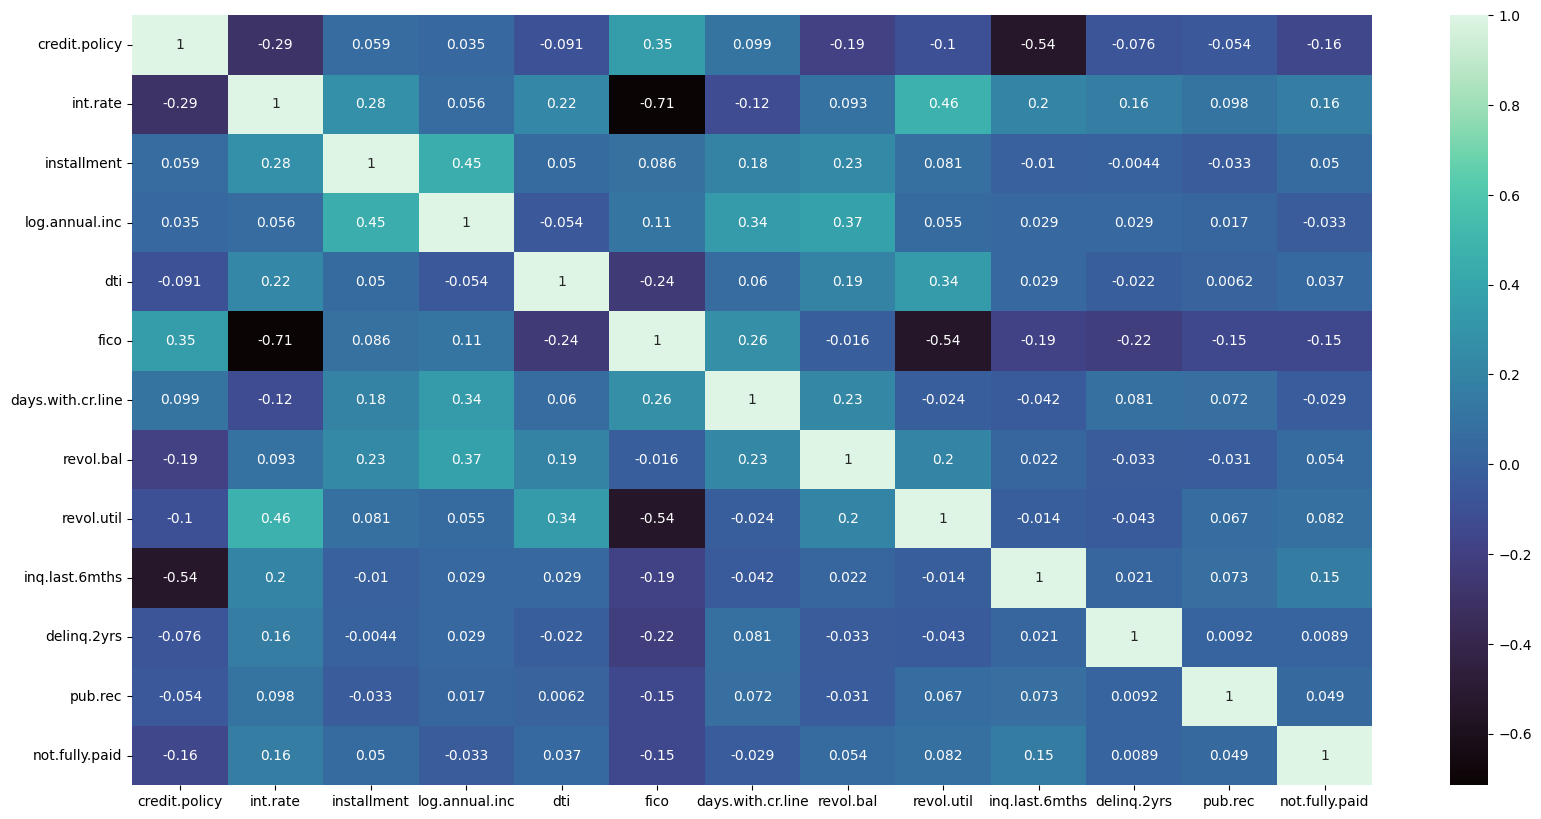

In [13]:
'''df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()
#print(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True,cmap="mako")
plt.figure(figsize=(20,10))
plt.show()'''
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(20, 10))  # Set the figure size before the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="mako")
plt.show()

# **Visualisations related to dataset**

<Axes: xlabel='credit.policy', ylabel='count'>

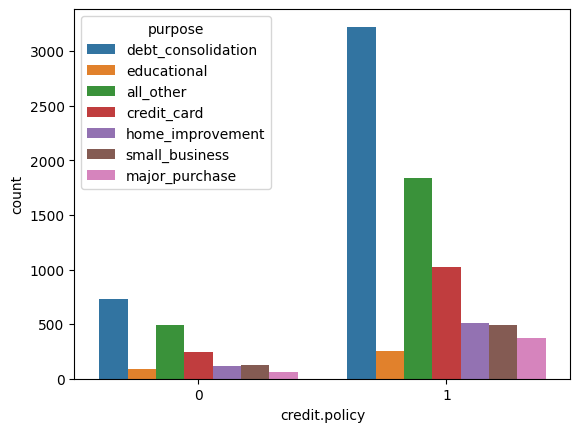

In [14]:
sns.countplot(x='credit.policy',hue='purpose',data=df)

in this countplot shows the which purpose of people are getting credit ploicy and not getting creditploicy . Maximum people debt_consolidation matched the credit criteria

In [15]:
df["credit.policy"].value_counts()

,count
credit.policy,
1,7710
0,1868


Here` 1` means that the customer is eligible for the policy
`0 `means that the customer is not eligible for the policy

In [16]:
df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


<Axes: xlabel='credit.policy', ylabel='purpose'>

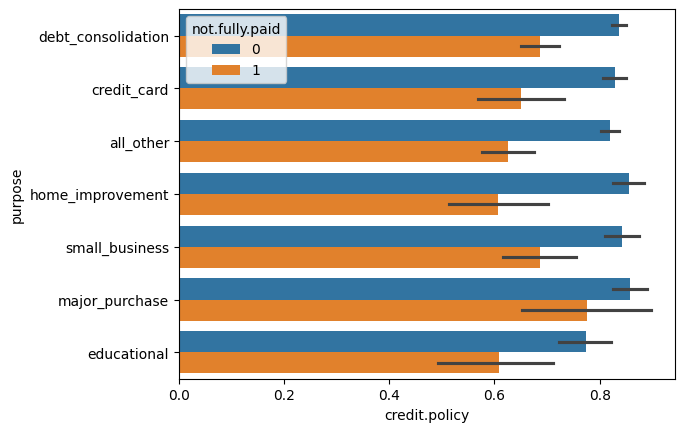

In [17]:
sns.barplot(x='credit.policy',y='purpose',hue='not.fully.paid',data=df)

A binary variable indicating whether the borrower hasn't fully paid the loan (1 for yes, 0 for no)

<Axes: ylabel='count'>

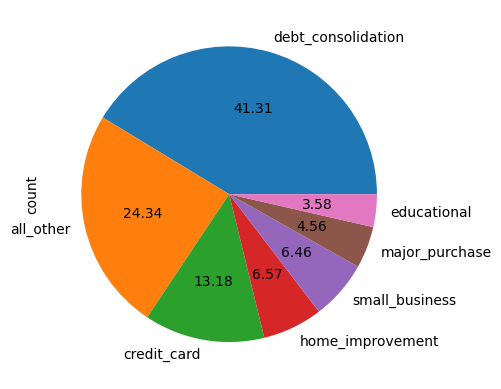

In [18]:
df['purpose'].value_counts().plot(kind='pie',autopct='%.2f')

The major purpose of taking the loan first for their `debt_consolidation(41.31%)` ,second for `all_other(24.34%)` and third  `credit_card(13.18%)` followed by others purposes

<Axes: ylabel='count'>

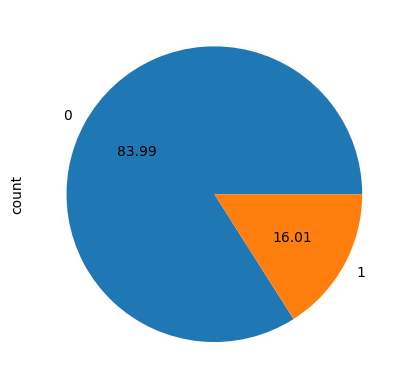

In [19]:
df['not.fully.paid'].value_counts().plot(kind='pie',autopct='%.2f')

almost 84% of the people not fully paid their loan .only the 16% of people are completely paid their loans

<Axes: xlabel='inq.last.6mths'>

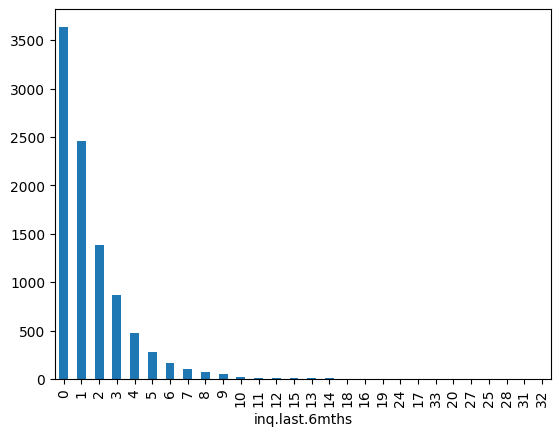

In [20]:
df['inq.last.6mths'].value_counts().plot(kind='bar')

The borrower's number of inquiries by creditors in the last 6 months are 0 is the heighst and 1 is the next then 2 followed by others.:

<Axes: xlabel='inq.last.6mths'>

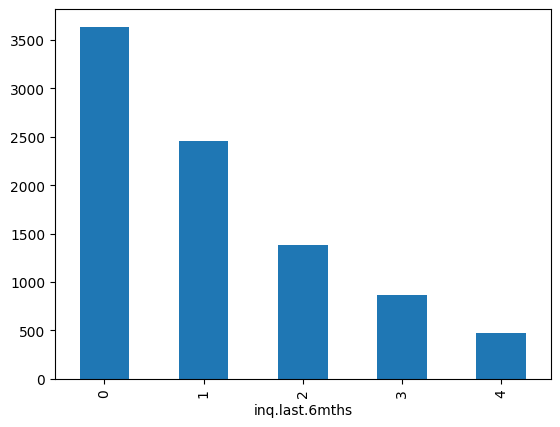

In [21]:
df['inq.last.6mths'].value_counts()[:5].plot(kind='bar')

The borrower's number of inquiries by creditors in the last 6 months Top 5 value counts

In [22]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<Axes: xlabel='days.with.cr.line', ylabel='purpose'>

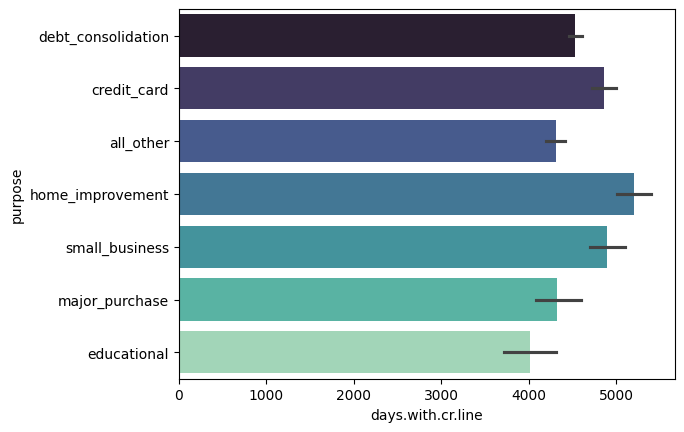

In [23]:
sns.barplot(data = df, x = 'days.with.cr.line', y = 'purpose',palette = 'mako')

it will shows the people who  are in credit line from how many days .majorly home_improvement

<Axes: ylabel='revol.util'>

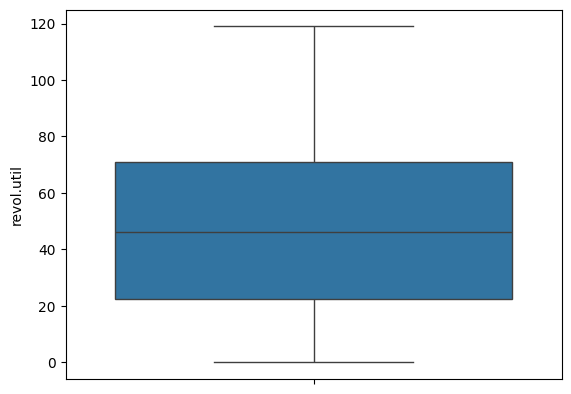

In [24]:
sns.boxplot(df['revol.util'])

Boxplot for revol.util

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

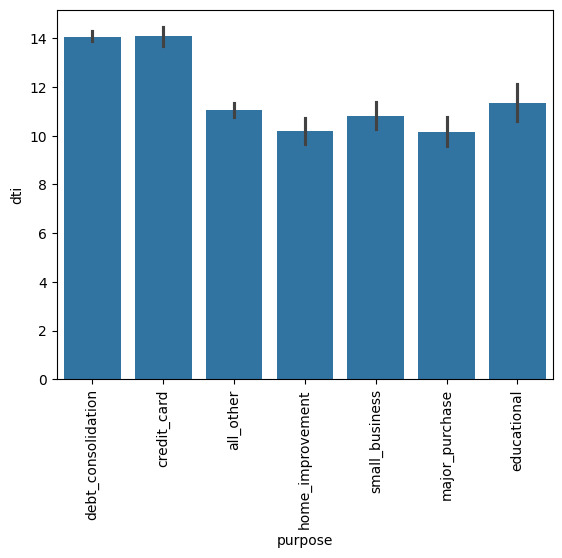

In [25]:
sns.barplot(data=df,x='purpose',y='dti')
plt.xticks(rotation=90)


Interest Rate vs. Credit Score:


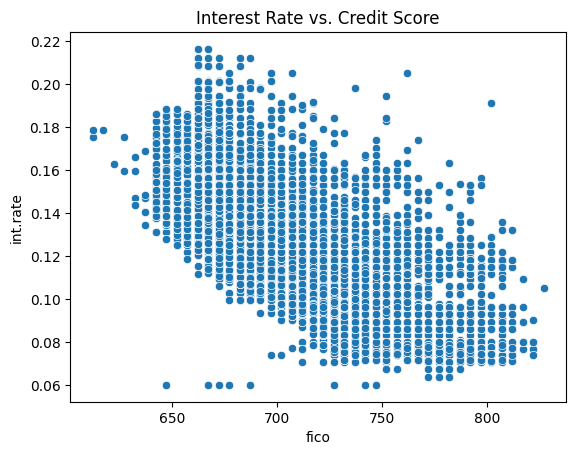

In [26]:
print("\nInterest Rate vs. Credit Score:")
sns.scatterplot(x='fico', y='int.rate', data=df)
plt.title('Interest Rate vs. Credit Score')
plt.show()

it shows the relationship between fico and int.rate how they are in the realtion


Debt-to-Income Ratio vs. Credit Score:


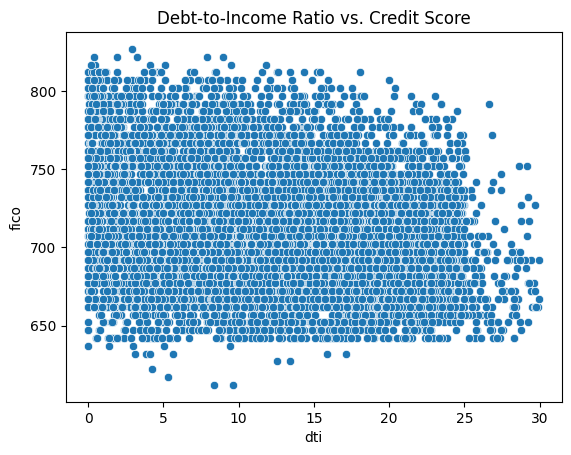

In [27]:
print("\nDebt-to-Income Ratio vs. Credit Score:")
sns.scatterplot(x='dti', y='fico', data=df)
plt.title('Debt-to-Income Ratio vs. Credit Score')
plt.show()

it shows the relationship between dti and fico


Loan Purpose Impact on Default:


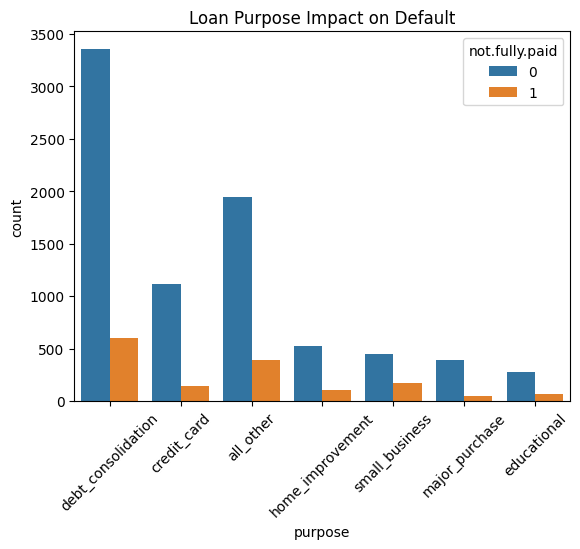

In [28]:
print("\nLoan Purpose Impact on Default:")
sns.countplot(x='purpose', hue='not.fully.paid', data=df)
plt.title('Loan Purpose Impact on Default')
plt.xticks(rotation=45)
plt.show()

in this countplot shows max no.of people taking loan for the purpose debt_consolidation and all_other and they are not fully paid


Delinquencies Impact on Default:


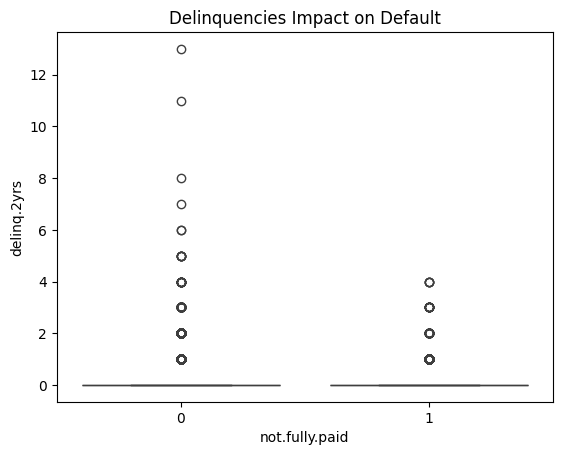

In [29]:
print("\nDelinquencies Impact on Default:")
sns.boxplot(x='not.fully.paid', y='delinq.2yrs', data=df)
plt.title('Delinquencies Impact on Default')
plt.show()


Public Records Impact on Default:


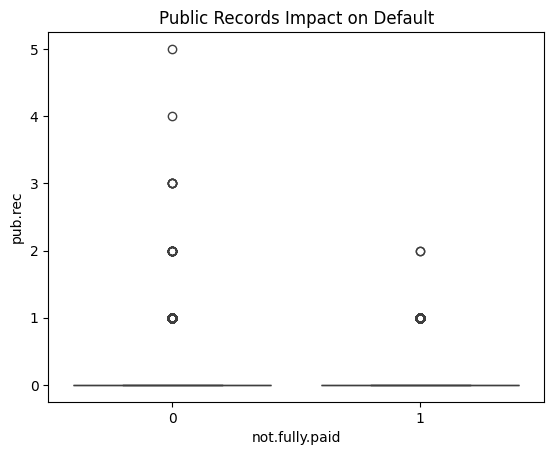

In [30]:
print("\nPublic Records Impact on Default:")
sns.boxplot(x='not.fully.paid', y='pub.rec', data=df)
plt.title('Public Records Impact on Default')
plt.show()

# Encoding
 Doing the one-Hot encoding for purpose

In [31]:
df_one_hot=pd.get_dummies(df,columns=['purpose'])
df_one_hot=df_one_hot.map(lambda x: 1 if x is True else (0 if x is False else x))


In [32]:
df_one_hot.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


we have done one hot encoding to the dataset for purpose coulmn

# **outliers**

After shape: (8617, 14)


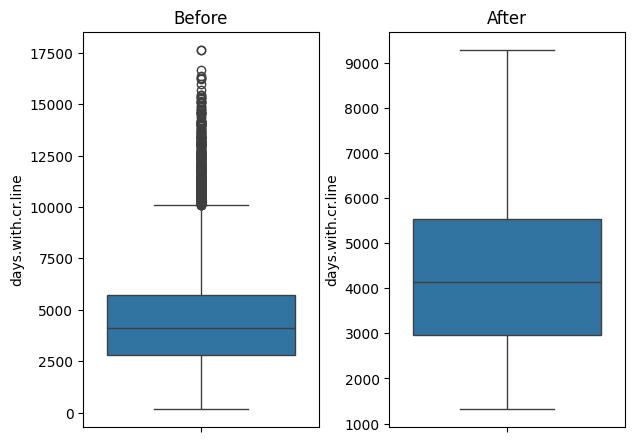

In [33]:
fig, axes = plt.subplots(1, 2)  # Create 1 row, 2 columns of subplots
plt.tight_layout(pad=2)  # Adjust spacing between subplots

max_val = df['days.with.cr.line'].quantile(0.95)  # Calculate the 95th percentile
min_val = df['days.with.cr.line'].quantile(0.05)  # Calculate the 5th percentile

df2 = df[(df['days.with.cr.line'] > min_val) & (df['days.with.cr.line'] < max_val)]
print("After shape:", df2.shape)

sns.boxplot(df["days.with.cr.line"], orient='v', ax=axes[0])  # Before removing outliers
axes[0].title.set_text("Before")

sns.boxplot(df2["days.with.cr.line"], orient='v', ax=axes[1])  # After removing outliers
axes[1].title.set_text("After")

In the above Box plots shows the Before and After detecting outliers

# **split Dataset**
       splitting Dataset into two parts
 1. train data
 2. test data

In [34]:
from sklearn.model_selection import train_test_split
# Split dataset into features (X) and target (y)
X = df.drop('not.fully.paid', axis=1)  # Features
X = pd.get_dummies(X)
y = df[['not.fully.paid']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (7662, 19)
Testing features shape: (1916, 19)
Training target shape: (7662, 1)
Testing target shape: (1916, 1)


model split the dataset can  be divided intlo two parts 1.tain data and 2.test data

# **Logistic Regression**

In [35]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg

LogisticRegression()

In [36]:
logreg.score(X_train,y_train)

0.8395980161837641

In [37]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# **DecisionTreeClassifier**

In [121]:
from sklearn.tree import  DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5, random_state=42)
dtree.fit(X_train,y_train)
dtree

DecisionTreeClassifier(max_depth=5, random_state=42)

In [39]:
dtree.score(X_train,y_train)

0.8459932132602453

In [40]:
y_pred_dtree=dtree.predict(X_test)
y_pred_dtree

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_dtree)))

Model accuracy score with 10 decision-trees : 0.8382


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
DTC=accuracy_score(y_test,y_pred_dtree)*100
DTC

83.82045929018788

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(f'Confusion matrix\n',confusion_matrix(y_test, y_pred_dtree))
print(f'Classification Report\n\n',classification_report(y_test,y_pred_dtree))

Confusion matrix
 [[1595   16]
 [ 294   11]]
Classification Report

               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.41      0.04      0.07       305

    accuracy                           0.84      1916
   macro avg       0.63      0.51      0.49      1916
weighted avg       0.77      0.84      0.78      1916



<Axes: >

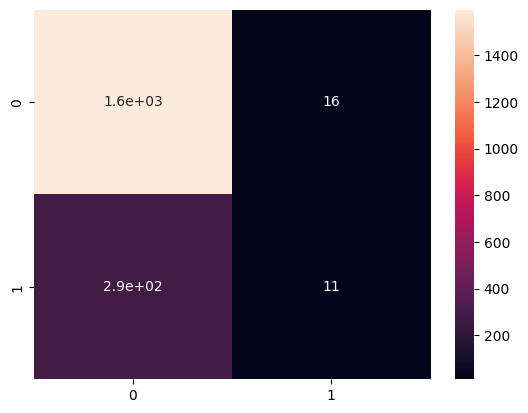

In [44]:
cm = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm,annot=True)

# **RandomForestClassifier**

In [45]:
#RandomForest Classifier with 10 estimators
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=5,random_state=42)
rf1.fit(X_train,y_train)
rf1.score(X_train,y_train)

0.8397285304098147

In [46]:
y_pred_rf1=rf1.predict(X_test)
y_pred_rf1

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf1)))

Model accuracy score with 10 decision-trees : 0.8408


In [48]:
#random forest with 100 estimators
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=5,criterion='gini',n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)
rf

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [49]:
rf.score(X_train,y_train)

0.8397285304098147

In [50]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score with 10 decision-trees : 0.8408


In [52]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(f'Confusion matrix\n',confusion_matrix(y_test, y_pred_rf))
print(f'Classification Report\n\n',classification_report(y_test,y_pred_rf))

Confusion matrix
 [[1611    0]
 [ 305    0]]
Classification Report

               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



<Axes: >

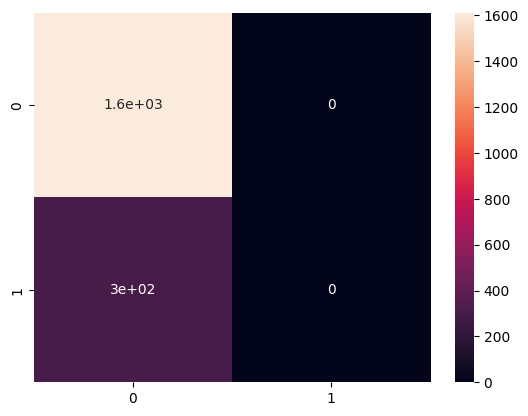

In [53]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm,annot=True)

In [54]:
RandomForest=accuracy_score(y_test,y_pred_rf)*100
RandomForest

84.08141962421712

# **KNeighborsClassifier**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [56]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
KNN=accuracy_score(y_test,y_pred_knn)*100
KNN

83.76826722338204

In [58]:
print(confusion_matrix(y_test,y_pred_knn))

[[1599   12]
 [ 299    6]]


In [59]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.33      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.59      0.51      0.47      1916
weighted avg       0.76      0.84      0.77      1916



<Axes: >

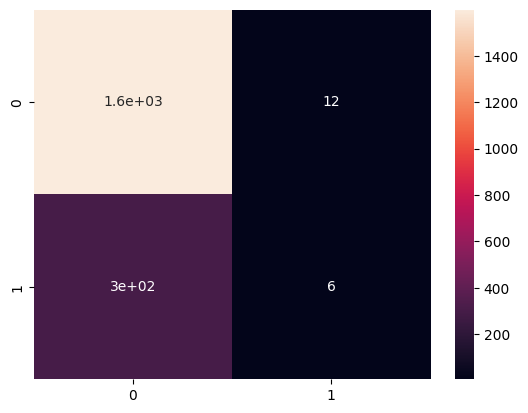

In [60]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm,annot=True)

# **Stratified K Fold Cross Validation**

In [61]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Prepare the features (X) and the target variable (y)
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target

# Encode categorical features
label_encoder = LabelEncoder()
X['purpose'] = label_encoder.fit_transform(X['purpose'])

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Set up K-Fold Cross Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute the average score
scores = cross_val_score(model, X, y, cv=kf)

# Display the cross-validated scores and average score
scores
scores.mean()

0.8396319573524043

# **AdaBoostClassifier**

In [62]:
#adaboost classifier
from  sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=10,learning_rate= 0.2,random_state=42)
ada.fit(X_train,y_train)
ada

AdaBoostClassifier(learning_rate=0.2, n_estimators=10, random_state=42)

In [63]:
ada.score(X_train,y_train)

0.8397285304098147

In [64]:
y_pred_ada=ada.predict(X_test)
d1=pd.DataFrame(y_pred_ada)
d1.value_counts()

,count
0,
0,1916


In [65]:
df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


In [66]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_ada)))

Model accuracy score with 10 decision-trees : 0.8408


In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test,y_pred_ada))

[[1611    0]
 [ 305    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



In [68]:
AdaBoost=accuracy_score(y_test,y_pred_ada)*100
AdaBoost

84.08141962421712

# **GradientBoostingClassifier**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [70]:
gbc.score(X_train,y_train)

0.852257896110676

In [71]:
y_pred_gbc=gbc.predict(X_test)
y_pred_gbc

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
print(confusion_matrix(y_test,y_pred_gbc))

[[1597   14]
 [ 298    7]]


In [73]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.33      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.59      0.51      0.48      1916
weighted avg       0.76      0.84      0.77      1916



In [74]:
GradientBoost=accuracy_score(y_test,y_pred_ada)*100
GradientBoost

84.08141962421712

<Axes: >

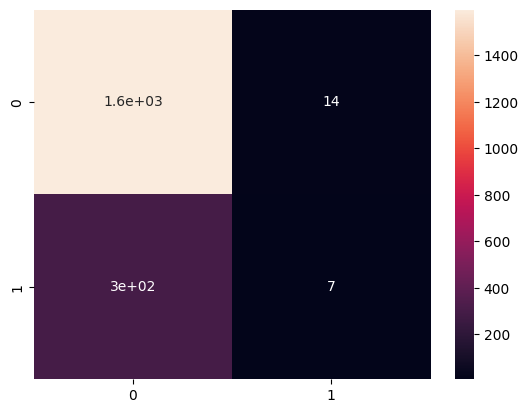

In [75]:
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm,annot=True)

# **Imbalanced dataset into Balanced dataset**

In [126]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming X_train is your features DataFrame and y_train is your target variable (Series)

# If y_train is a DataFrame, extract the specific column:
# y_train = y_train['not.fully.paid']

# Initialize SMOTE
smote = SMOTE(k_neighbors=5,n_jobs=-1,sampling_strategy='auto',random_state=42)

# Resample the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure y_train_resampled is a Series
if isinstance(y_train_resampled, pd.DataFrame):
    y_train_resampled = y_train_resampled.iloc[:, 0]  # Extract the first column as a Series

# Check the counts of the resampled dataset
resampled_counts = y_train_resampled.value_counts()
print(resampled_counts)



not.fully.paid
0    6434
1    6434
Name: count, dtype: int64


In [127]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression(random_state=42,n_jobs=-1,max_iter=100)
logreg.fit(X_train_resampled, y_train_resampled )
logreg


LogisticRegression(n_jobs=-1, random_state=42)

In [128]:
logreg.score(X_train_resampled, y_train_resampled )

0.5789555486478085

In [129]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [130]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.558455114822547


In [131]:
from sklearn.tree import  DecisionTreeClassifier
bal_dtree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5, random_state=42)
bal_dtree.fit(X_train_resampled, y_train_resampled)
bal_dtree

DecisionTreeClassifier(max_depth=5, random_state=42)

In [132]:
y_pred_bal=logreg.predict(X_test)
y_pred_bal

array([1, 1, 1, ..., 0, 0, 0])

In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred_bal))

Accuracy: 0.558455114822547


In [134]:
#random forest with 100 estimators
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=5,criterion='gini',n_jobs=-1,random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
rf

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [135]:
y_pred=rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [136]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7593945720250522


# **Support Vector Machine**

In [81]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(kernel='poly',C=4, random_state=0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred_svm=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.5585


In [82]:
SVM=accuracy_score(y_test,y_pred_svm)*100
SVM

84.08141962421712

In [83]:
accuracy_scores_all= [DTC,SVM,KNN,RandomForest,GradientBoost,AdaBoost]
acc_scores=pd.DataFrame(accuracy_scores_all,index=['Decision Tree','Support Vector Machine','K-Nearest Neighbors','RandomForest','GradientBoost','AdaBoost'],columns=['Accuracy Scores'])
acc_scores

,Accuracy Scores
Decision Tree,83.820459
Support Vector Machine,84.081420
K-Nearest Neighbors,83.768267
RandomForest,84.081420
GradientBoost,84.081420
AdaBoost,84.081420


In [84]:
svc=SVC(kernel='rbf',C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8408


In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

xgb = XGBClassifier(random_state = 1001)

params = {'n_estimators' : list(range(100,1050,50)),
        'learning_rate' : list(np.arange(0.1, 1.7, 0.1)),
        'gamma': list(np.arange(0, 5.25, 0.25)),
        'max_depth': [1,2]
        }

In [86]:
# Instantiate RandomizedSearchCV with the XGBoost classifier and parameter grid
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=10, cv=5, random_state=1001)

# Fit the random search to your training data (replace X_train and y_train with your actual data)
random_search.fit(X_train, y_train)

random_search.best_params_
#random_search.best_params_

{'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.2, 'gamma': 2.5}

In [87]:
import time
start = time.time()
random_search = RandomizedSearchCV(xgb, param_distributions = params, scoring = 'roc_auc', n_jobs = -1,
                                   cv = 5, random_state=1001 )

random_search.fit(X_train, y_train)
#print ('It took', time.time()-start, 'seconds.')

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  3.75, 4.0, 4.25, 4.5, 4.75,
                                                  5.0],
                                        'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0, 1.1,
                                                          1.2000000000000002,
                                                          1.3000000000000003,
                                                          1.4000000000000001,
                                                          1.5000000000000002,
                                                          1.6],
                                        'max_depth': [1, 2],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000]},
                   random_state=1001, scoring='roc_auc')

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1).mean()


0.8390754148506572

In [89]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# **Conclusion**

1. In this  project effectively classified wheather customer is fully paid or not fully paid their loan.if the customer n.t fully paid (1 Yes and 0 No) based on several features
2. the Maximum no.of people are taking credit policy for their debt_consolidation and follwed by others and thery are also not fully paid.
3. Among the models tested (Logistic Regression,Decision Tree,Random Forest, SVM, KNN,k=fold,AdaBoost,XGBClassifier, gridsearchcv), one model (likely GradientBoost,AdaBoost or SVM) provided the highest accuracy in predicting the correct notfullypaid making it the best for this specific classification task.
4. when we are coverting imbalanced dataset into balance dataset by using `from imblearn.over_sampling import SMOTE` then we are applying logisitc regression,DecisionTree and Randomforest outoff these algorithms Randomforest will give the good accuracy

